In [2]:
#Define Dependencies 
import pandas as pd
import numpy as np
import requests
import json
import os
import gmaps
import matplotlib.pyplot as plt

from config_googlemaps import api_key
from citipy import citipy

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
weather = requests.get(url).json()
# Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [4]:
city_data = []
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    city_url = url + "&q=" + city
    weather = requests.get(city_url).json() 
    try:
        city_country = weather['sys']['country']
    except KeyError:
        "City not Found"
    city_data.append({"country":city_country})
print(pd.DataFrame(city_data))
        
    
    

    country
0        GR
1        PT
2        VU
3        BN
4        NO
5        AU
6        ZA
7        NZ
8        RU
9        MX
10       ZA
11       US
12       GA
13       BR
14       CA
15       IN
16       EC
17       CL
18       BB
19       TL
20       US
21       RU
22       AU
23       CA
24       IR
25       US
26       TO
27       PF
28       US
29       NZ
..      ...
576      MM
577      CO
578      CN
579      CA
580      AO
581      US
582      ID
583      AR
584      AR
585      TW
586      IN
587      AU
588      CA
589      JP
590      JP
591      PT
592      CA
593      US
594      CM
595      PL
596      US
597      SO
598      KZ
599      ID
600      KZ
601      KZ
602      RU
603      RU
604      IN
605      AU

[606 rows x 1 columns]


In [5]:
# Starting URL for Weather Map API Call


city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 0

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city_name}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 0 | Saint George
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133de24cf603b4acf1f77cc59ffc97c4&q=['Saint George']
City not found. Skipping...
Processing Record 1 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133de24cf603b4acf1f77cc59ffc97c4&q=['Saint George', 'Ribeira Grande']
City not found. Skipping...
Processing Record 2 | Isangel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133de24cf603b4acf1f77cc59ffc97c4&q=['Saint George', 'Ribeira Grande', 'Isangel']
City not found. Skipping...
Processing Record 3 | Victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133de24cf603b4acf1f77cc59ffc97c4&q=['Saint George', 'Ribeira Grande', 'Isangel', 'Victoria']
City not found. Skipping...
Processing Record 4 | Longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=133de24cf603b4acf1f77cc59ff

In [36]:
#Export the city data into a .csv.
#Display the DataFrame


summary_table = pd.DataFrame({"City": city_name,
                              "Country": country,
                              "Date": date
                              "Humidity": humidity
                              "Cloudiness": cloudiness,
                              "Latitude": lat,
                              "Longitude": lng,
                              "Windiness": wind_speed,
                              "Tempature": max_temp})

summary_table





SyntaxError: invalid syntax (<ipython-input-36-a35d69c715ba>, line 8)

In [ ]:
.style.format({"Average Price": "${:.2f}", "Total Revenue": "${:.2f}"})

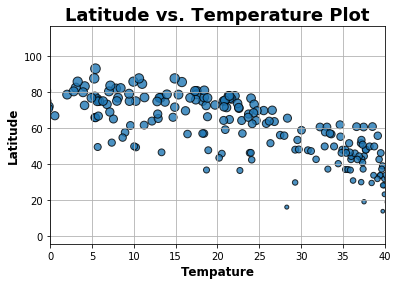

In [13]:
#Scatter plot Latitude vs. Temperature Plot
plt.scatter(lat, 
            max_temp, 
            s=1*max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Tempature")
plt.title("Latitude vs. Temperature", fontsize= 18,fontweight = 800)
plt.ylabel("Latitude",fontsize= 12, fontweight = 800)
plt.xlabel("Tempature",fontsize= 12,fontweight = 800)
plt.xlim((0,40))
plt.grid(True)



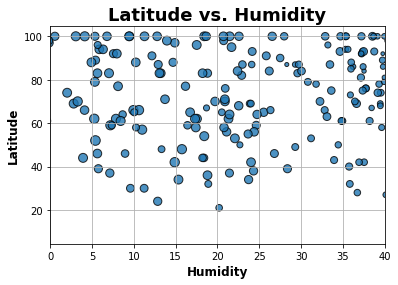

In [14]:
#Scatter plot Latitude vs. Humidity Plot
plt.scatter(lat, 
            humidity, 
            s=2*max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Tempature")
plt.title("Latitude vs. Humidity", fontsize= 18,fontweight = 800)
plt.ylabel("Latitude",fontsize= 12, fontweight = 800)
plt.xlabel("Humidity",fontsize= 12,fontweight = 800)
plt.xlim((0,40))
plt.grid(True)

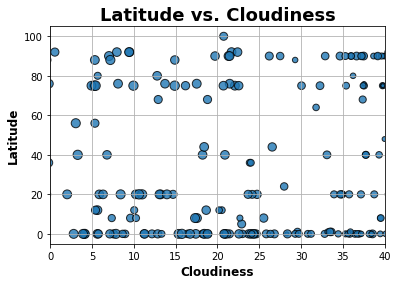

In [15]:
#Scatter plot  Latitude vs. Cloudiness Plot
plt.scatter(lat, 
            cloudiness, 
            s=2*max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Tempature")
plt.title("Latitude vs. Cloudiness", fontsize= 18,fontweight = 800)
plt.ylabel("Latitude",fontsize= 12, fontweight = 800)
plt.xlabel("Cloudiness",fontsize= 12,fontweight = 800)
plt.xlim((0,40))
plt.grid(True)

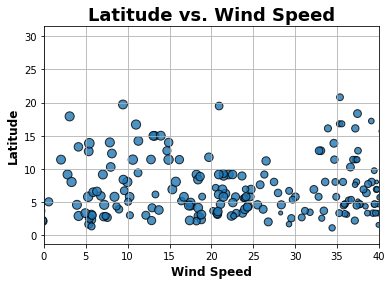

In [16]:
#scatter plot  Latitude vs. Wind Speed Plot
plt.scatter(lat, 
            wind_speed, 
            s=2*max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Tempature")
plt.title("Latitude vs. Wind Speed", fontsize= 18,fontweight = 800)
plt.ylabel("Latitude",fontsize= 12, fontweight = 800)
plt.xlabel("Wind Speed",fontsize= 12,fontweight = 800)
plt.xlim((0,40))
plt.grid(True)

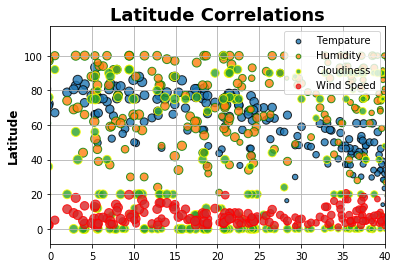

In [24]:
#Scatterplot
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude
plt.scatter(lat, 
            max_temp, 
            s=2*max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Tempature")
plt.scatter(lat, 
            humidity, 
            s=2*max_temp,
            edgecolor="green", linewidths=1, marker="o",
            alpha=0.8, label="Humidity")
plt.scatter(lat, 
            cloudiness, 
            s=2*max_temp,
            edgecolor="yellow", linewidths=1, marker="o",
            alpha=0.8, label="Cloudiness")
plt.scatter(lat, 
            wind_speed, 
            s=2*max_temp,
            edgecolor="red", linewidths=1, marker="o",
            alpha=0.8, label="Wind Speed")
plt.title("Latitude Correlations", fontsize= 18,fontweight = 800)
plt.ylabel("Latitude",fontsize= 12, fontweight = 800)
plt.xlabel("",fontsize= 12,fontweight = 800)
plt.xlim((0,40))
plt.grid(True)
plt.legend(loc = "upper right")